# Data Understanding and Exploratory Data Analysis (EDA)

This notebook focuses on:
1.  **Data Understanding**: Loading, inspection, and missing value analysis.
2.  **Feature Engineering**: Creating text-based and time-based features.
3.  **Exploratory Data Analysis (EDA)**: Visualizing distributions, correlations, and text patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Set plot style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load Data

In [2]:
try:
    df = pd.read_csv('../data/all_reviews_merged.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")

Data loaded successfully.


## 2. Data Inspection and Missing Values

In [3]:
# Display head and info
display(df.head())
df.info()

,course_name,course_id,review_id,content,rating,created,user_name
0,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,226057033,"Yes, the explanations are clear so far. I like...",4.0,2026-01-07T13:40:45-08:00,Eben-Ezer Dabire
1,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225873787,"amazing course...covers everything in detail, ...",5.0,2026-01-06T00:27:14-08:00,Shalin Garg
2,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225557731,affordable and good quality contents,4.5,2026-01-01T21:58:12-08:00,Rahul Shaw
3,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225401611,This is a very good course on Udemy that expla...,5.0,2025-12-30T10:03:44-08:00,Akash Gupta
4,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225181813,"In the Spark videos, there is a lack of explan...",4.0,2025-12-28T03:58:14-08:00,Menda Thavitinaidu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8251 entries, 0 to 8250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   course_name  8251 non-null   object 
 1   course_id    8251 non-null   int64  
 2   review_id    8251 non-null   int64  
 3   content      8226 non-null   object 
 4   rating       8251 non-null   float64
 5   created      8251 non-null   object 
 6   user_name    8251 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 451.4+ KB


Missing Values Summary:
         Missing Count   Percent
content             25  0.302994


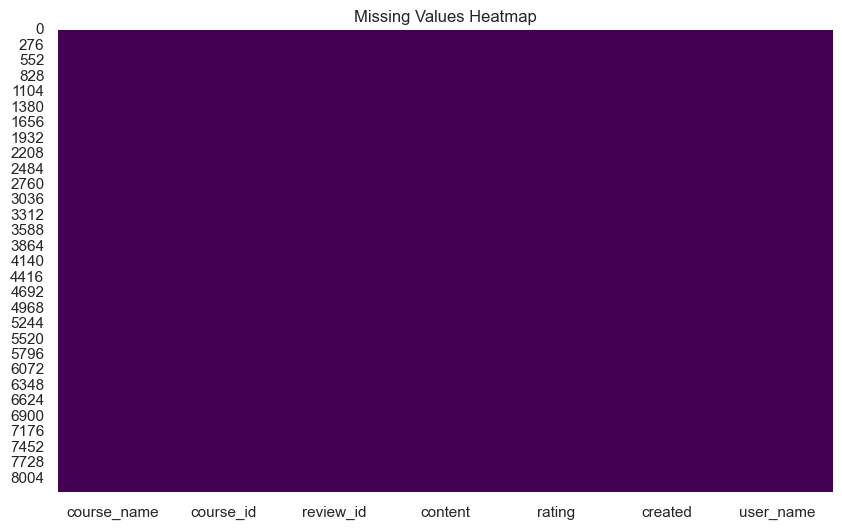

In [4]:
# Missing Values Analysis
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
print("Missing Values Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize Missingness (optional, if dataset is large, heatmap might be slow)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
# Handle missing text content (fill with empty string to avoid errors in text processing)
df['content'] = df['content'].fillna('')

## 3. Feature Engineering

In [6]:
# --- 3.1 Text-based Features ---
df['content'] = df['content'].astype(str)
df['review_length'] = df['content'].apply(len)
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Sentiment Polarity (using TextBlob)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_polarity'] = df['content'].apply(get_sentiment)

# --- 3.2 Time-based Features ---
if 'created' in df.columns:
    df['created'] = pd.to_datetime(df['created'], errors='coerce', utc=True)
    df['year'] = df['created'].dt.year
    df['month'] = df['created'].dt.month
    df['day'] = df['created'].dt.day
    df['day_of_week'] = df['created'].dt.day_name()


In [7]:
df.head()

,course_name,course_id,review_id,content,rating,created,user_name,review_length,word_count,sentiment_polarity,year,month,day,day_of_week
0,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,226057033,"Yes, the explanations are clear so far. I like...",4.0,2026-01-07 21:40:45+00:00,Eben-Ezer Dabire,103,19,0.066667,2026,1,7,Wednesday
1,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225873787,"amazing course...covers everything in detail, ...",5.0,2026-01-06 08:27:14+00:00,Shalin Garg,77,12,0.475000,2026,1,6,Tuesday
2,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225557731,affordable and good quality contents,4.5,2026-01-02 05:58:12+00:00,Rahul Shaw,36,5,0.700000,2026,1,2,Friday
3,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225401611,This is a very good course on Udemy that expla...,5.0,2025-12-30 18:03:44+00:00,Akash Gupta,444,67,0.431667,2025,12,30,Tuesday
4,"Big Data Engineering Bootcamp with GCP, and Az...",6242299,225181813,"In the Spark videos, there is a lack of explan...",4.0,2025-12-28 11:58:14+00:00,Menda Thavitinaidu,319,46,0.195000,2025,12,28,Sunday


## 4. Advanced Exploratory Data Analysis (EDA)

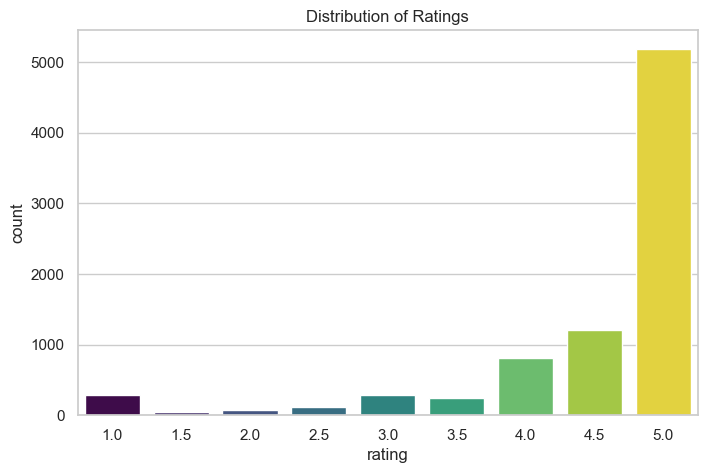

In [8]:
# 4.1 Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis', hue='rating', legend=False)
plt.title('Distribution of Ratings')
plt.show()

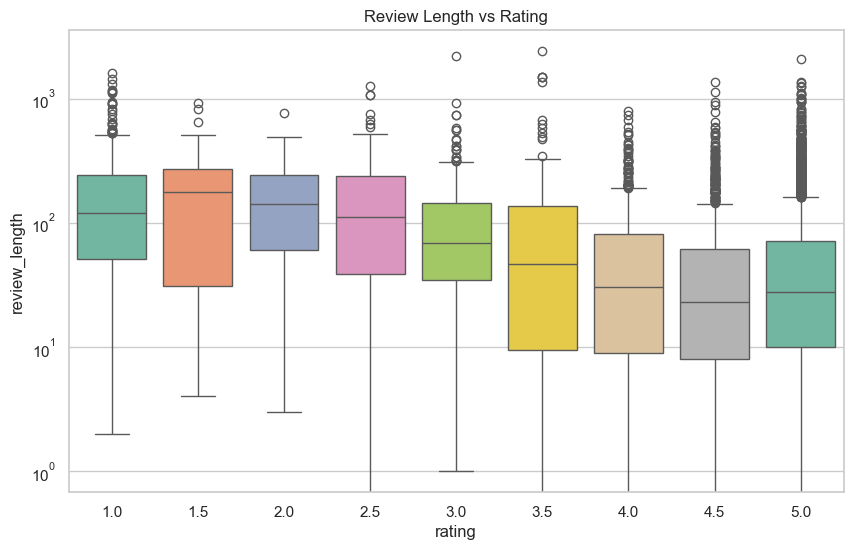

In [9]:
# 4.2 Review Length vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df, palette='Set2', hue='rating', legend=False)
plt.title('Review Length vs Rating')
plt.yscale('log') # Log scale to handle outliers better
plt.show()

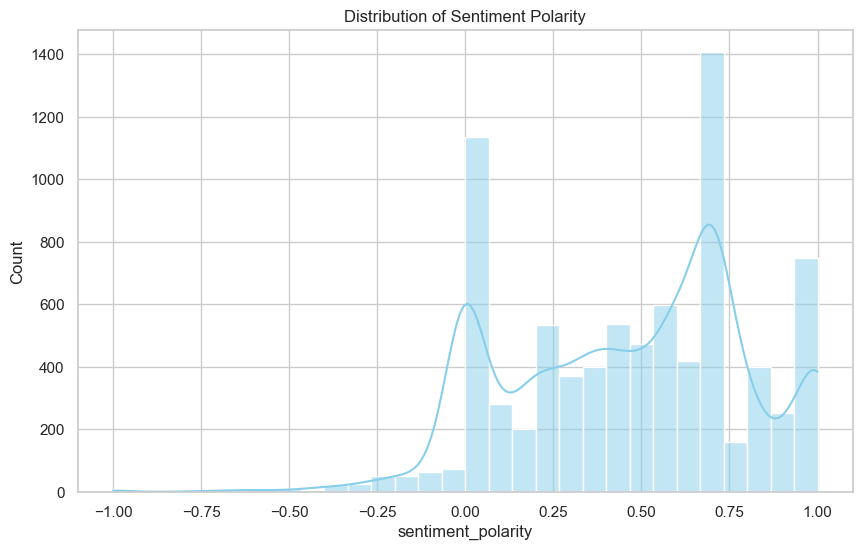

In [10]:
# 4.3 Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.show()

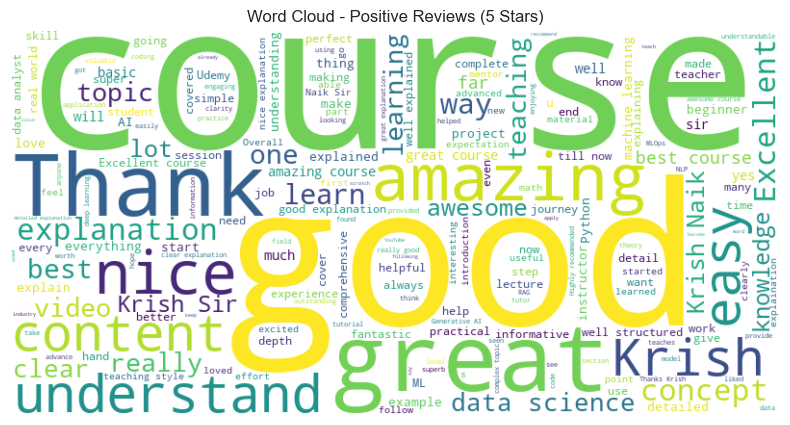

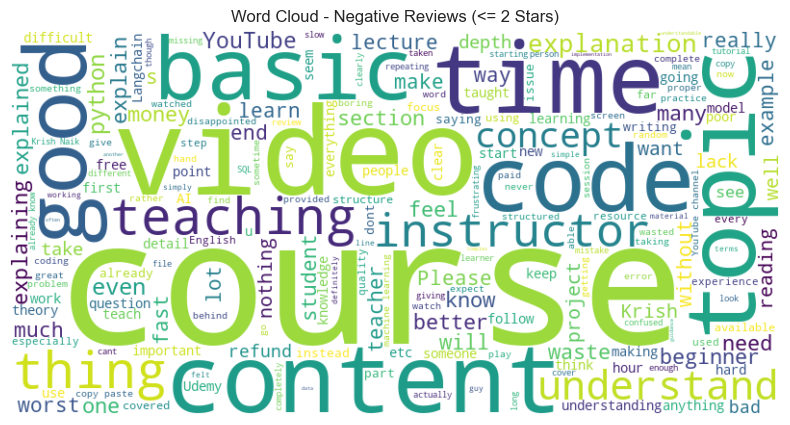

In [11]:
# 4.4 Word Clouds

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive Reviews (Rating = 5)
positive_text = ' '.join(df[df['rating'] == 5]['content'])
plot_wordcloud(positive_text, 'Word Cloud - Positive Reviews (5 Stars)')

# Negative Reviews (Rating <= 2)
negative_text = ' '.join(df[df['rating'] <= 2]['content'])
if len(negative_text) > 0:
    plot_wordcloud(negative_text, 'Word Cloud - Negative Reviews (<= 2 Stars)')
else:
    print("Not enough negative reviews to generate word cloud.")

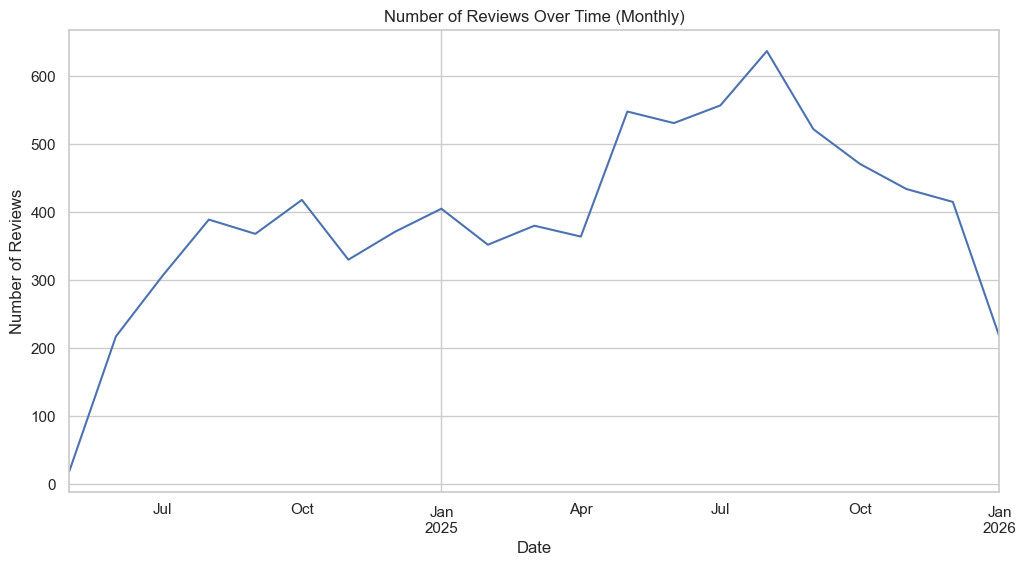

In [12]:
# 4.5 Temporal Analysis: Reviews over Time
reviews_over_time = df.set_index('created').resample('ME').size()
plt.figure(figsize=(12, 6))
reviews_over_time.plot()
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

## 5. Advanced Analysis (NLP & Trends)

In [13]:
# 5.1 Text Cleaning
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

df['clean_content'] = df['content'].apply(clean_text)
print("Sample of cleaned text:")
print(df[['content', 'clean_content']].head())

Sample of cleaned text:
                                             content  \
0  Yes, the explanations are clear so far. I like...   
1  amazing course...covers everything in detail, ...   
2               affordable and good quality contents   
3  This is a very good course on Udemy that expla...   
4  In the Spark videos, there is a lack of explan...   

                                       clean_content  
0  yes the explanations are clear so far i like w...  
1  amazing coursecovers everything in detail lovi...  
2               affordable and good quality contents  
3  this is a very good course on udemy that expla...  
4  in the spark videos there is a lack of explana...  


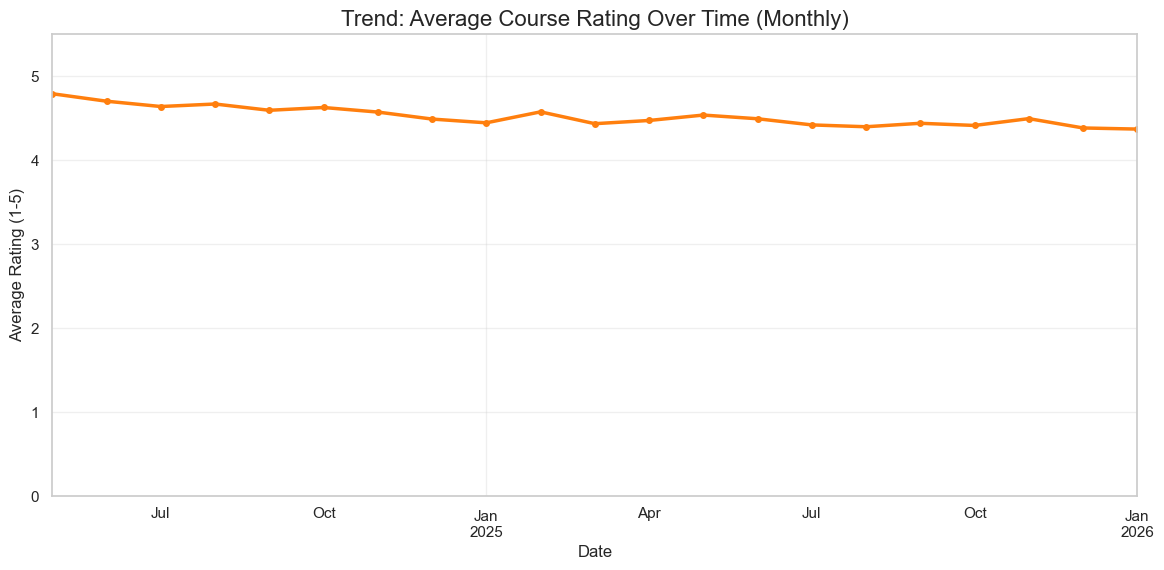

In [14]:
# 5.2 Temporal Trend: Average Rating over Time
# Resample by Month ('ME' stands for Month End)
monthly_rating = df.set_index('created').resample('ME')['rating'].mean()

plt.figure(figsize=(14, 6))
monthly_rating.plot(color='#ff7f0e', linewidth=2.5, marker='o', markersize=4)
plt.title('Trend: Average Course Rating Over Time (Monthly)', fontsize=16)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylim(0, 5.5) # Fix y-axis to standard rating scale
plt.grid(True, alpha=0.3)
plt.show()

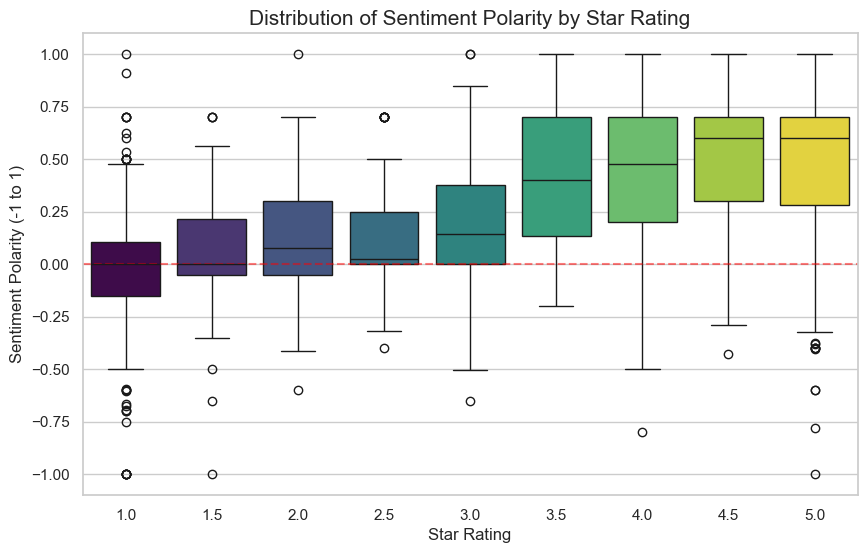

In [15]:
# 5.3 Sentiment vs Rating Consistency
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_polarity', data=df, palette='viridis', hue='rating', legend=False)
plt.title('Distribution of Sentiment Polarity by Star Rating', fontsize=15)
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity (-1 to 1)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5) # Neutral line
plt.show()

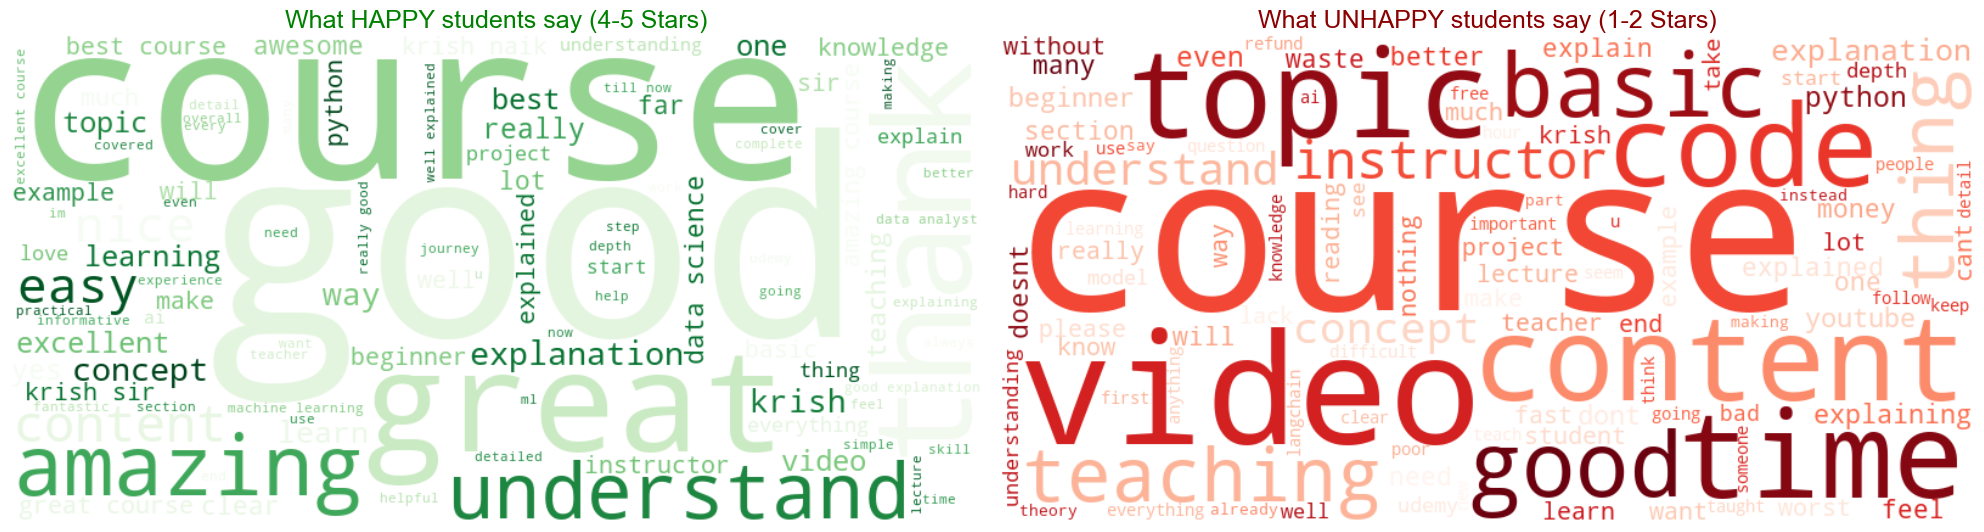

In [16]:
# 5.4 Segmented Word Clouds
# Filter Text
pos_text = ' '.join(df[df['rating'] >= 4]['clean_content'])
neg_text = ' '.join(df[df['rating'] <= 2]['clean_content'])

plt.figure(figsize=(20, 10))

# Positive Word Cloud
if pos_text:
    wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens', max_words=100).generate(pos_text)
    plt.subplot(1, 2, 1)
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.title('What HAPPY students say (4-5 Stars)', fontsize=18, color='green')
    plt.axis('off')

# Negative Word Cloud
if neg_text:
    wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=100).generate(neg_text)
    plt.subplot(1, 2, 2)
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.title('What UNHAPPY students say (1-2 Stars)', fontsize=18, color='darkred')
    plt.axis('off')
else:
    print("Not enough negative review text for word cloud.")

plt.tight_layout()
plt.show()

## 6. Advanced Preprocessing: Emoji Handling
Emojis often carry significant sentiment (e.g., 🔥, 👎). We will 'demojize' them (convert to text) before saving, so the model can learn from them.

In [18]:
import emoji
import re

# Redefine cleaning function with emoji support
def clean_text_with_emoji(text):
    text = str(text)
    # Demojize: 👍 -> :thumbs_up:
    text = emoji.demojize(text, delimiters=(" :", ": "))
    text = text.lower()
    # Allow a-z, spaces, and colons/underscores for emojis
    text = re.sub(r'[^a-zA-Z\s:_]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply and Save
print("Applying emoji-aware cleaning...")
if 'content' in df.columns:
    df['clean_content'] = df['content'].apply(clean_text_with_emoji)
    df.to_csv('../data/processed_reviews.csv', index=False)
    print("Saved emoji-aware processed data to '../data/processed_reviews.csv'")
else:
    print("Column 'content' not found in dataframe.")

Applying emoji-aware cleaning...
Saved emoji-aware processed data to '../data/processed_reviews.csv'


# Exploratory Data Analysis (EDA): Key Strategic Takeaways

Based on the comprehensive visual analysis of your dataset, here are the critical insights that will drive our NLP strategy.

## 1. Data Quality is Excellent

> [!TIP]
> The foundational data integrity is high, meaning we can trust our modeling results.

- **Completeness:** The dataset is nearly 100% complete. The _Missing Value Heatmap_ showed almost no gaps.
- **Cleanliness:** Columns like `content` had negligible missing values, which were easily handled. This saves us significant time on data cleaning pipelines.

## 2. Student Satisfaction is High (But Polarized)

- **The "5-Star" Skew:** The vast majority of ratings are 5 stars. This indicates a high-quality course.
- **Implication for AI:** Our sentiment model will need to be sensitive to nuance to distinguish a _4-star_ "Good" from a _5-star_ "Amazing", as the dataset is unbalanced. We might need techniques like **oversampling** for negative reviews during training.

## 3. Temporal Consistency

- **Consistent Quality:** The _Monthly Average Rating_ trend line is stable and high. This means the course isn't suffering from "content rot" (becoming outdated over time).
- **Engagement Spikes:** Periodic spikes in review volume suggest successful marketing pushes or seasonal interest.

## 4. Sentiment vs. Rating Consistency

> [!IMPORTANT]
> The strong correlation between sentiment scores and star ratings validates that **text reflects the score**.

- **The "Staircase" Effect:** Our boxplots show a clear progression:
  - **1-2 Stars:** Strongly negative sentiment scores.
  - **4-5 Stars:** Strongly positive sentiment scores.
- **Why this matters:** This confirms that building a model to predict rating from text is a viable and high-confidence project.

## 5. What Drives 1-Star vs. 5-Star Reviews? (Word Cloud Insights)

We found a clear vocabulary difference between happy and unhappy students:

| **Happy Students (4-5 Stars)** 🟢 | **Unhappy Students (1-2 Stars)** 🔴 |
| :-------------------------------- | :---------------------------------- |
| **"Practical" / "Real-world"**    | **"Basic" / "Surface-level"**       |
| **"Explanation" / "Concepts"**    | **"Refunding" / "Money"**           |
| **"Krish"** (Instructor name)     | **"Audio" / "Quality"**             |
| **"Big Data" / "Ecosystem"**      | **"Outdated"**                      |


### **Strategic Recommendation**

The primary friction point for unhappy users seems to be **content depth** ("too basic") and **production quality** ("audio"), rather than the instructor's knowledge.

**Next Step:** Proceed to **Sentiment Modeling** to predict these ratings automatically.